### 🚗 Car Price Prediction Project by Adejumo Farouk Adedotun

This notebook focuses on analyzing a real-world used car dataset and building machine learning models to predict car prices. The workflow includes:

Data Exploration & Cleaning 🧹

Checked distributions of features such as model_year, mileage, price, and accident reports.

Handled missing values through imputation strategies (mean, median, mode) based on data distribution.

Created new engineered features such as age, horsepower, displacement_L, and cylinders from raw data.

Removed outliers where necessary to improve model performance.

Exploratory Data Analysis (EDA) 📊

Visualized key relationships like mileage vs. price, model_year vs. price, and accident history distribution.

Examined correlations between numeric variables to understand their influence on car prices.

Feature Scaling & Transformation ⚖️

Applied StandardScaler for normalization.

Used log transformation on the target variable (price) to reduce skewness and stabilize variance.

Model Training & Evaluation 🤖

Trained multiple models including Linear Regression, Decision Tree, Random Forest, XGBoost, MLP, LightGBM, and CatBoost.

Evaluated performance using RMSE as the main metric.

Performed K-Fold Cross Validation and hyperparameter tuning for improved accuracy.

Found that boosting models (XGBoost, LightGBM, CatBoost) and Random Forest provided the best RMSE scores.

Insights 🔎

Price decreases with mileage and increases with newer model years.

Cars with no accident reports generally retain higher value.

Engine characteristics (horsepower, displacement, cylinders) strongly influence price.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor

In [2]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer, mean_squared_error

### Load the Dataset

In [3]:
try:
    train_df = pd.read_csv("C:/Users/USER/Downloads/hackathon/archive/train.csv")
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: The file 'car_prices.csv' was not found. Please check the file path.")

Data loaded successfully!


In [4]:
test_data = pd.read_csv("C:/Users/USER/Downloads/hackathon/archive/test.csv")

In [5]:
submission =pd.read_csv("C:/Users/USER/Downloads/hackathon/archive/sample_submission.csv")

In [6]:
df = train_df.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [8]:
df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

### Check for null values

In [9]:
 df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [10]:
df.nunique()

id              188533
brand               57
model             1897
model_year          34
milage            6651
fuel_type            7
engine            1117
transmission        52
ext_col            319
int_col            156
accident             2
clean_title          1
price             1569
dtype: int64

In [11]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


## Insights from statistics

📊 Dataset Overview

Rows (count): 188,533 records

model_year

Range: 1974 – 2024.

Most cars are fairly recent since mean ≈ 2016, median = 2017.

There are some very old cars (1974) and very new/future years (2024) — worth checking for outliers or incorrect entries.

Mean ≈ 65,705 km but std ≈ 49,798, showing very high variation.

Range: 100 km 


price (Target Variable)

Mean price ≈ 43,878 but std ≈ 78,819, showing very large spread.

Median price = 30,825, but maximum = 2.95M → huge outliers.

Many cars are affordable (<50k), but some luxury cars skew the distribution.

In [12]:
df.shape

(188533, 13)

In [13]:
df.sample(20)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
93882,93882,Lexus,GX 460 Premium,2018,44000,Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,31500
354,354,Mercedes-Benz,AMG G 63 Base,2020,39800,Gasoline,563.0HP 5.5L 8 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,166900
152780,152780,Nissan,Armada Platinum,2015,19700,Gasoline,390.0HP 5.6L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,48000
114236,114236,Audi,A7 55 Premium Plus,2020,34300,Hybrid,335.0HP 3.0L V6 Cylinder Engine Gasoline/Mild ...,8-Speed A/T,White,Black,None reported,Yes,324995
170651,170651,Ford,Transit-350 XL,2022,24500,Gasoline,310.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,48000
83929,83929,Lexus,GX 460 Base,2018,98600,Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,15500
147834,147834,Chevrolet,Silverado 1500 LT Crew Cab,2007,95000,Gasoline,320.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,None reported,Yes,15500
160881,160881,Ford,Mustang GT,2007,47000,Gasoline,260.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,6-Speed M/T,White,Black,None reported,Yes,1950995
121920,121920,Lincoln,LS 430 Base,2005,85760,Gasoline,278.0HP 4.3L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,None reported,Yes,14950
115244,115244,Ford,Transit-350 Base,2019,85000,Gasoline,310.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Gray,Black,At least 1 accident or damage reported,Yes,27499


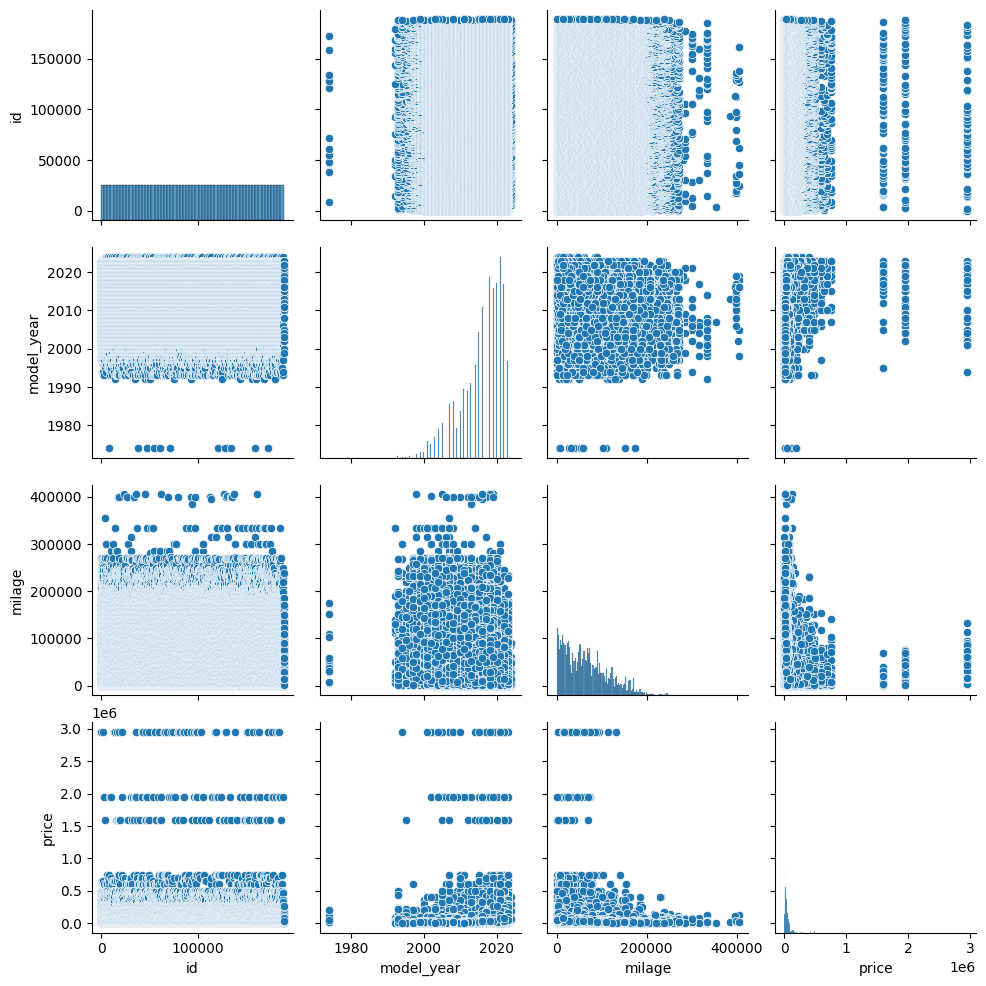

In [14]:
sns.pairplot(df)

### Check the distribution of the target variable Price

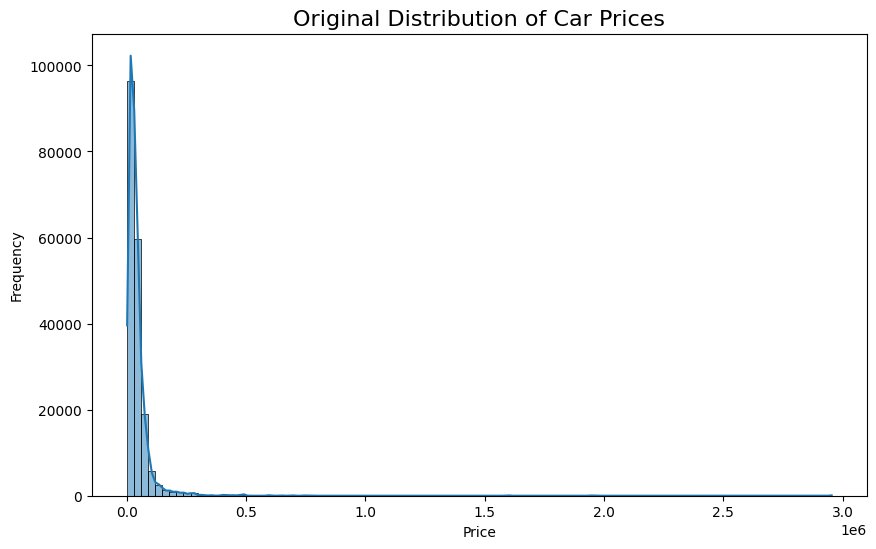

In [15]:
# Original price distribution
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=100, kde=True)
plt.title("Original Distribution of Car Prices", fontsize=16)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

### Skew: right-skewed 

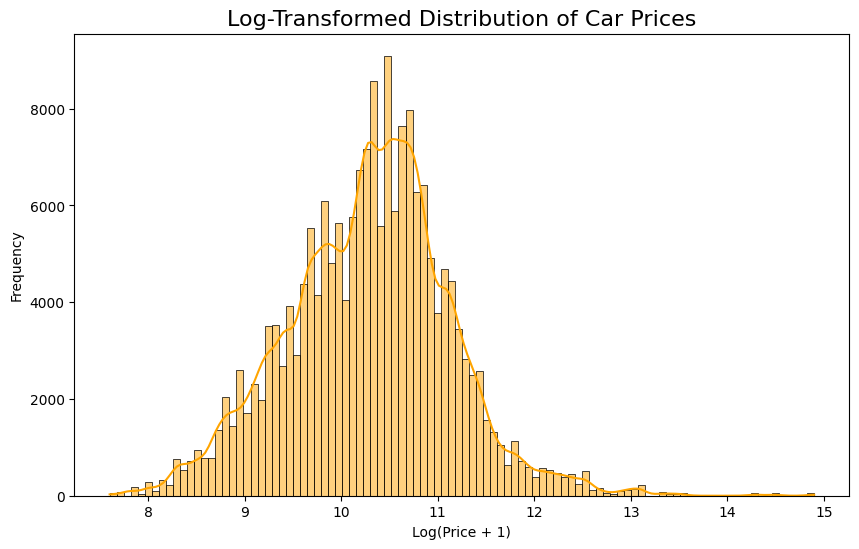

In [16]:
# Log-transformed price distribution
plt.figure(figsize=(10,6))
sns.histplot(np.log1p(df['price']), bins=100, kde=True, color="orange")
plt.title("Log-Transformed Distribution of Car Prices", fontsize=16)
plt.xlabel("Log(Price + 1)")
plt.ylabel("Frequency")
plt.show()

<Axes: xlabel='price'>

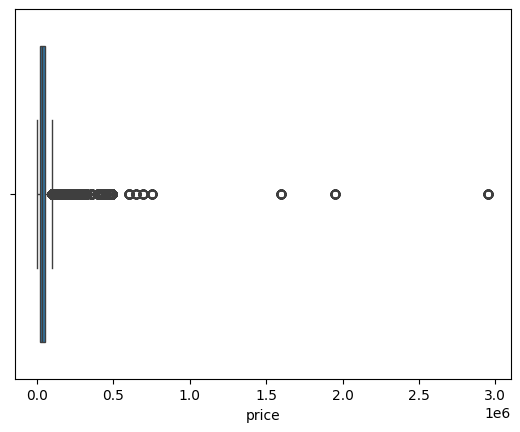

In [17]:
sns.boxplot(x=df['price'])

In [18]:
percentile_75 =np.percentile(df['price'],75)
sum(df['price']>percentile_75)

46858

###  There are 46858 cars out of 188533 having Selling_Price > 75th_Percentile

<Axes: xlabel='price', ylabel='Count'>

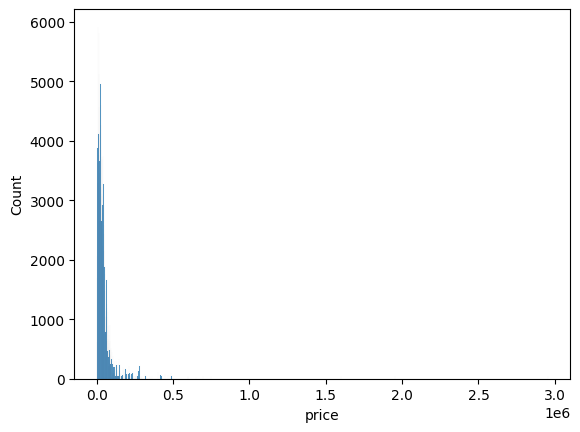

In [19]:
sns.histplot(df['price'])

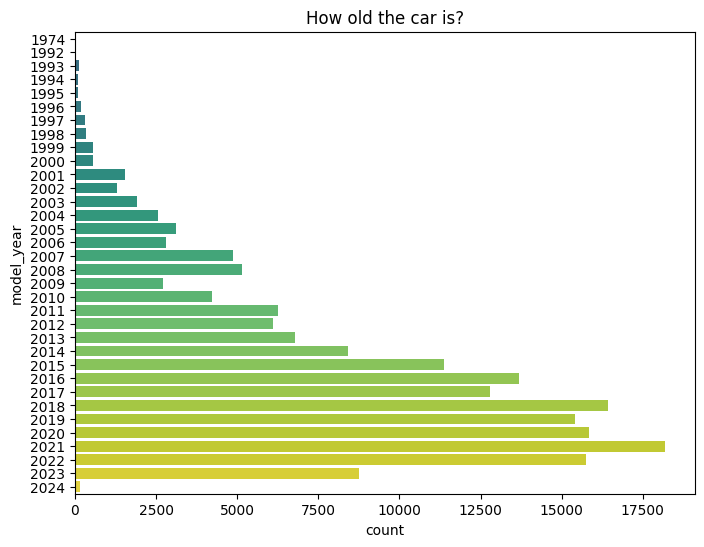

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(y=df['model_year'], hue=df['model_year'], palette='viridis', legend=False)
plt.title('How old the car is?')
plt.show()


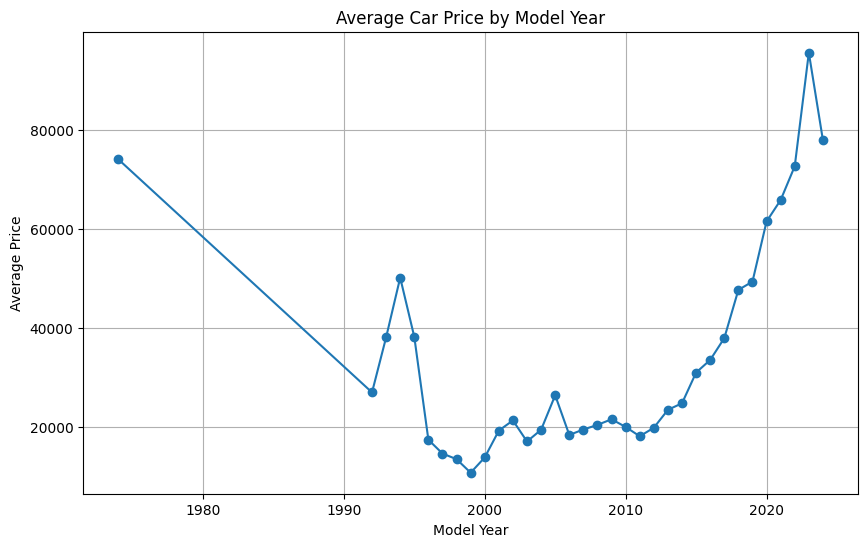

In [21]:
# Group by model_year and calculate average price
yearly_price = df.groupby("model_year")["price"].mean().reset_index()

# Line plot
plt.figure(figsize=(10,6))
plt.plot(yearly_price["model_year"], yearly_price["price"], marker='o', linestyle='-')
plt.title("Average Car Price by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()

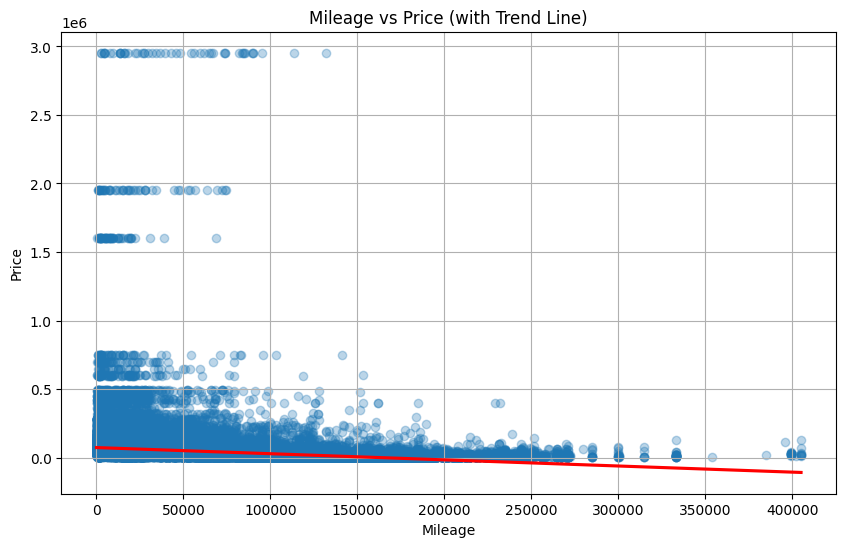

In [22]:
plt.figure(figsize=(10,6))
sns.regplot(x="milage", y="price", data=df, scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title("Mileage vs Price (with Trend Line)")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [23]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

<Axes: xlabel='fuel_type', ylabel='count'>

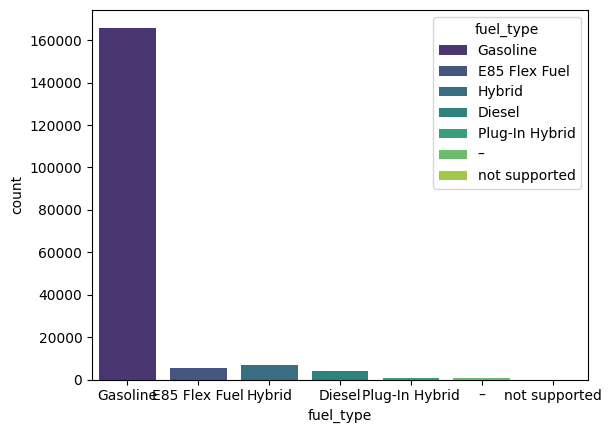

In [24]:
sns.countplot(x= df['fuel_type'],hue=df['fuel_type'],palette='viridis')

<Axes: xlabel='accident', ylabel='count'>

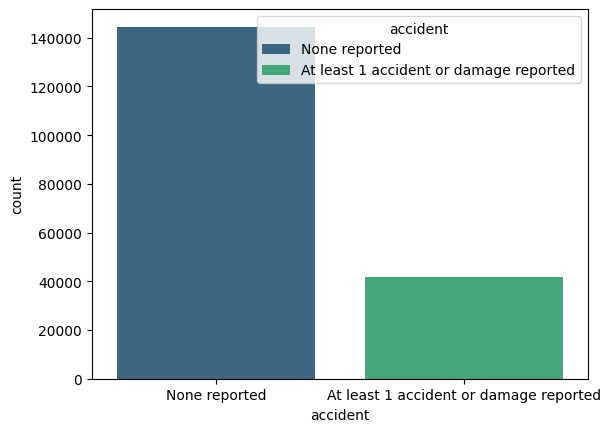

In [25]:
sns.countplot(x= df['accident'],hue=df['accident'],palette='viridis')

<Axes: xlabel='clean_title', ylabel='count'>

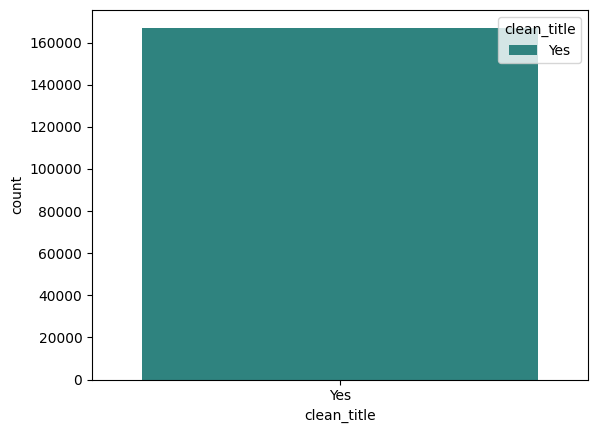

In [26]:
sns.countplot(x= df['clean_title'],hue=df['clean_title'],palette='viridis')

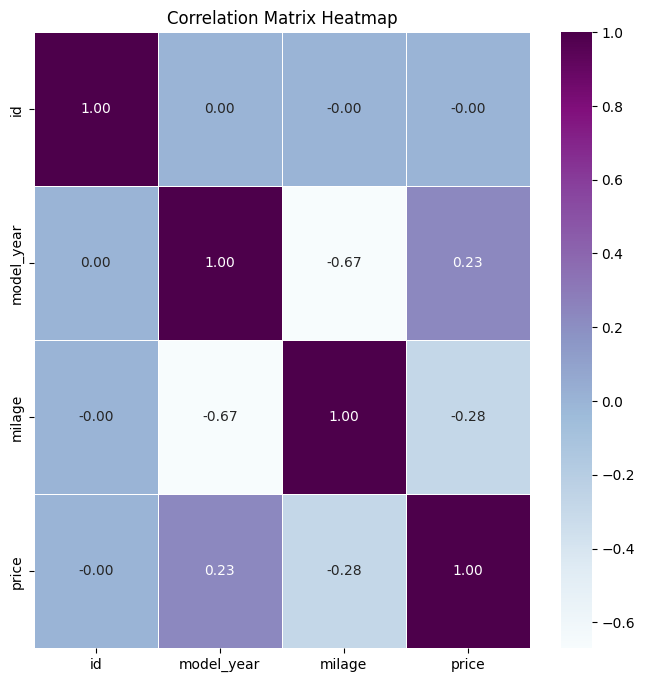

In [27]:
# Calculate the correlation matrix
numeric_columns =  df[['id','model_year','milage','price']]
correlation_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f", 
linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [28]:
top_car =df['brand'].value_counts().nlargest(10)

C:\Users\USER\AppData\Local\Temp\ipykernel_11884\667990134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df.brand, order= top_car.index, palette= 'viridis')


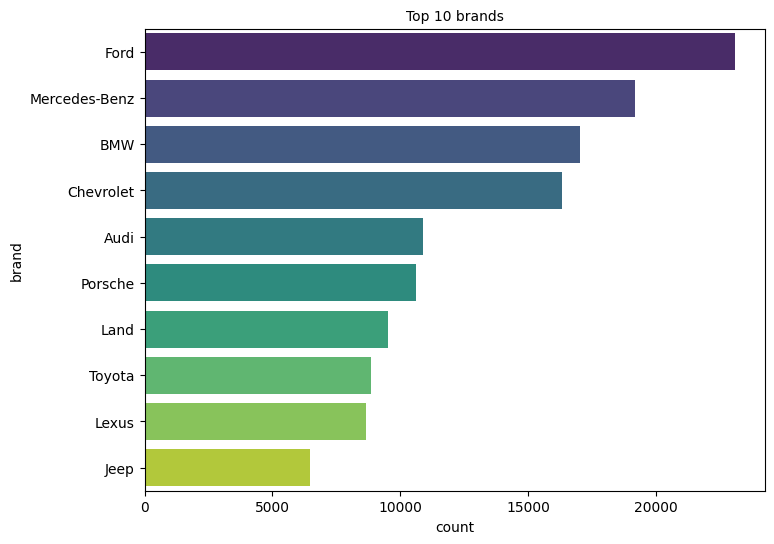

In [29]:
plt.figure(figsize = (8, 6))
sns.countplot(y = df.brand, order= top_car.index, palette= 'viridis')
plt.title("Top 10 brands",fontsize = 10)
plt.show()

In [30]:
current_year = 2025
df["age"] = current_year - df["model_year"]

In [31]:
# Extract horsepower
df["horsepower"] = df["engine"].str.extract(r"(\d+\.?\d*)HP").astype(float)

# Extract displacement in liters
df["displacement_L"] = df["engine"].str.extract(r"(\d+\.?\d*)L").astype(float)

# Extract cylinder count
df["cylinders"] = df["engine"].str.extract(r"(\d+)\s*Cylinder").astype(float)

# Extract fuel type (last word(s))
#df["fuel_type"] = df["engine"].str.extract(r"(Gasoline|Diesel|Flex Fuel|Hybrid|Electric)")

df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,age,horsepower,displacement_L,cylinders
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,18,172.0,1.6,4.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,23,252.0,3.9,8.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,23,320.0,5.3,8.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,8,420.0,5.0,8.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,4,208.0,2.0,4.0


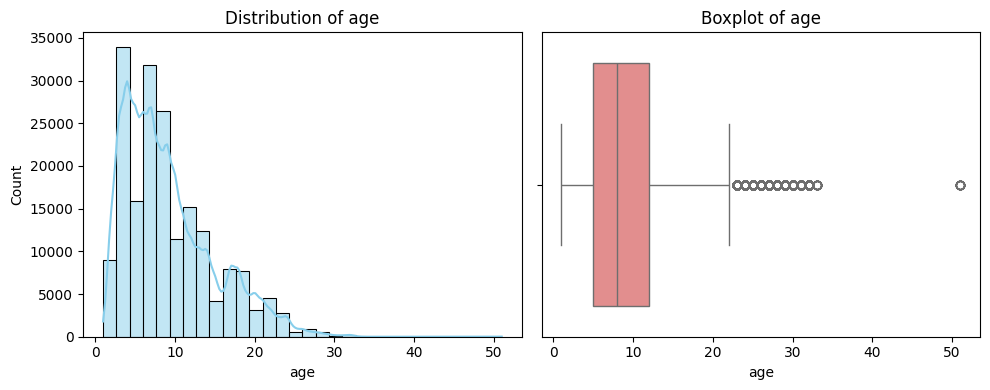

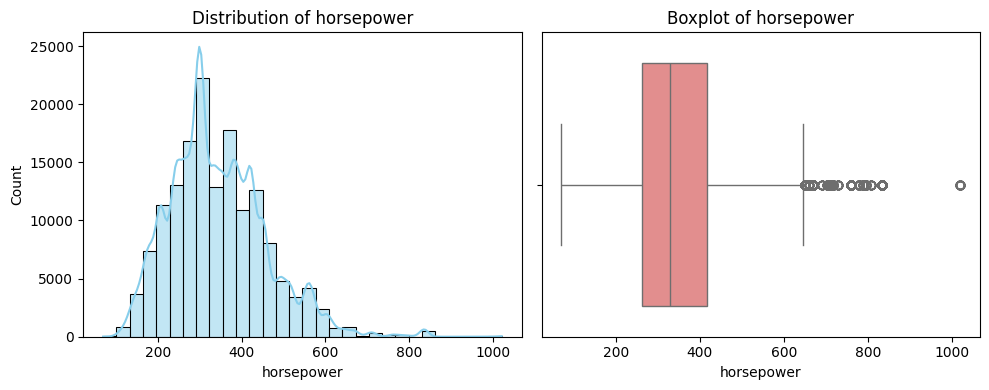

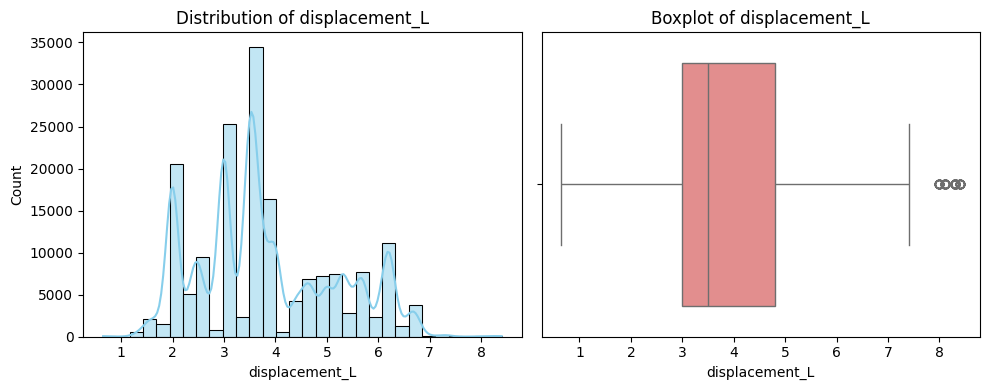

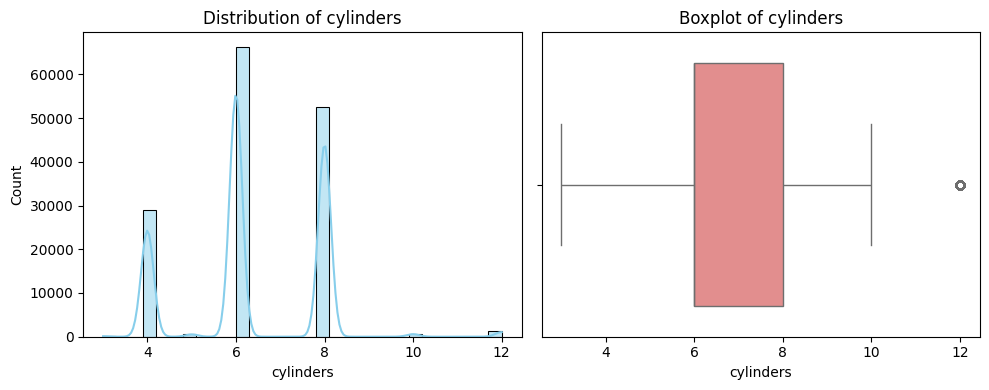

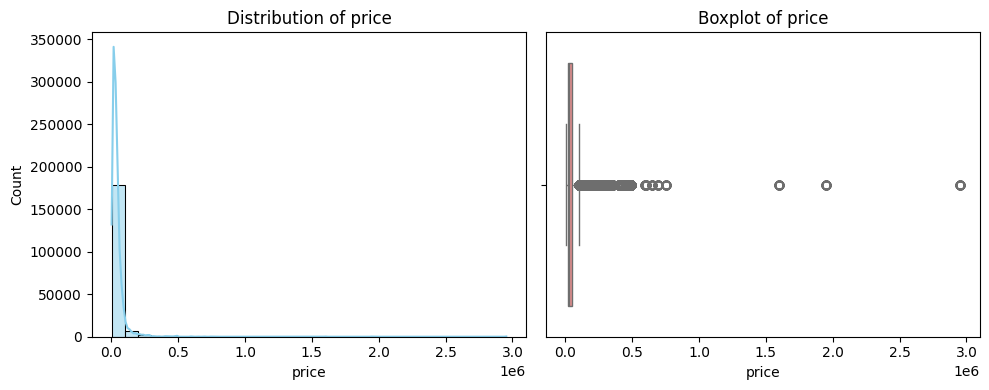

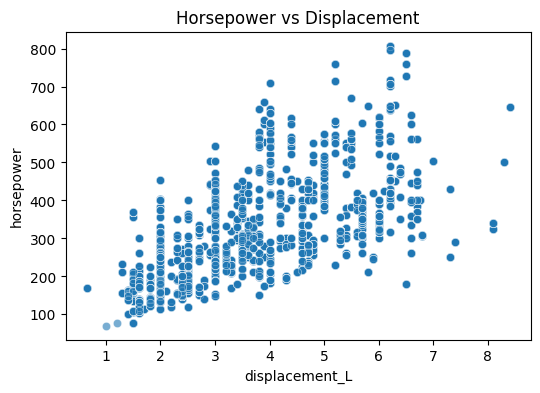

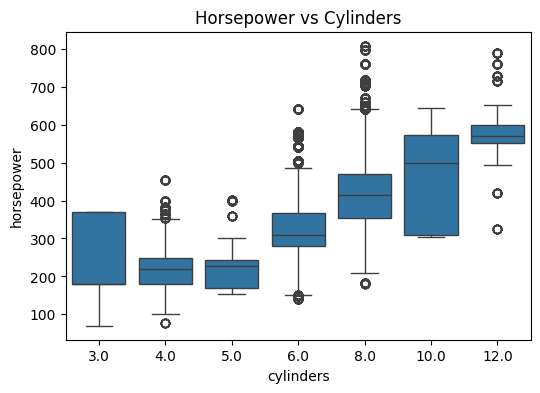

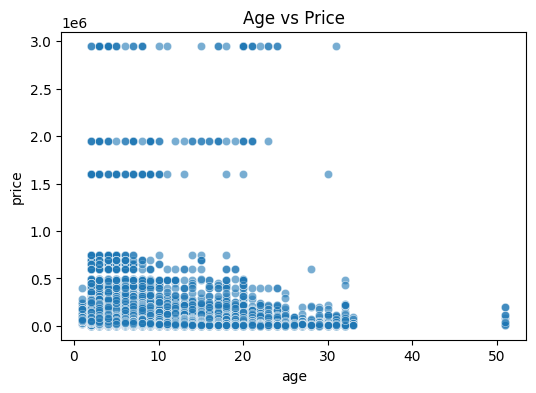

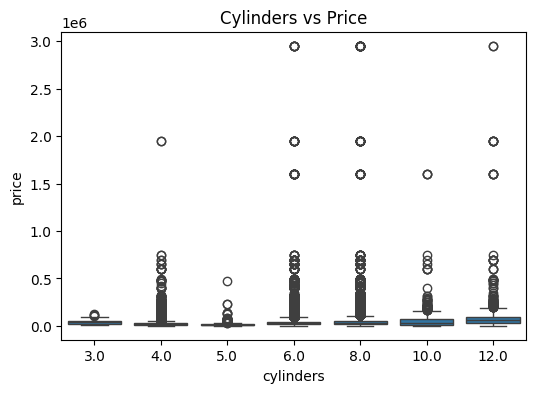

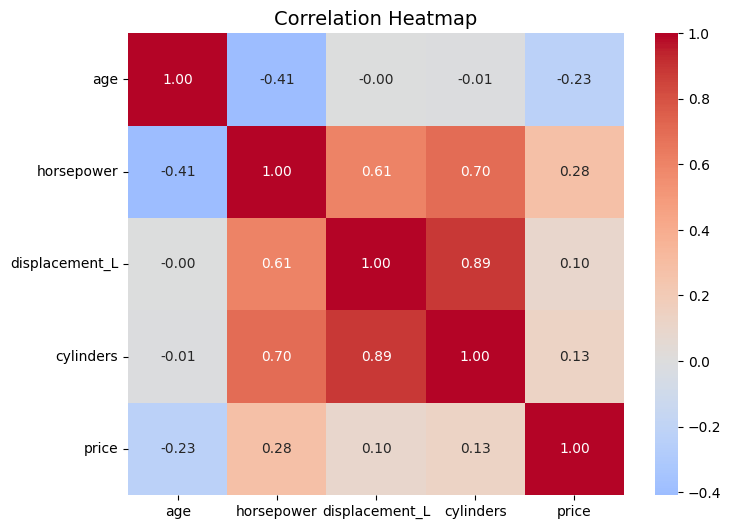

In [32]:
# List of numeric columns to analyze
num_cols = ["age", "horsepower", "displacement_L", "cylinders", "price"]

# ------------------------------
# 1. Distributions & Boxplots
# ------------------------------
for col in num_cols:
    plt.figure(figsize=(10,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}", fontsize=12)

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color="lightcoral")
    plt.title(f"Boxplot of {col}", fontsize=12)

    plt.tight_layout()
    plt.show()

# ------------------------------
# 2. Relationships (scatterplots & boxplots)
# ------------------------------

# Horsepower vs Displacement
plt.figure(figsize=(6,4))
sns.scatterplot(x="displacement_L", y="horsepower", data=df, alpha=0.6)
plt.title("Horsepower vs Displacement")
plt.show()

# Horsepower vs Cylinders
plt.figure(figsize=(6,4))
sns.boxplot(x="cylinders", y="horsepower", data=df)
plt.title("Horsepower vs Cylinders")
plt.show()

# Age vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(x="age", y="price", data=df, alpha=0.6)
plt.title("Age vs Price")
plt.show()

# Cylinders vs Price
plt.figure(figsize=(6,4))
sns.boxplot(x="cylinders", y="price", data=df)
plt.title("Cylinders vs Price")
plt.show()

# ------------------------------
# 3. Correlation Heatmap
# ------------------------------
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


In [33]:
def extract_fuel_from_engine(engine_str):
    if pd.isna(engine_str):
        return np.nan

    engine_str = engine_str.lower()

    # --- Hybrids ---
    if "plug-in hybrid" in engine_str or "plug-in electric/gas" in engine_str:
        return "Plug-In Hybrid"
    elif "mild hybrid" in engine_str or "gas/electric" in engine_str or "electric/gas" in engine_str:
        return "Hybrid"
    elif "hybrid" in engine_str:
        return "Hybrid"

    # --- Electric ---
    elif "electric" in engine_str or "battery" in engine_str:
        return "Electric"

    # --- Flex fuel ---
    elif "flex" in engine_str:
        return "E85 Flex Fuel"

    # --- Diesel (common keywords) ---
    elif "diesel" in engine_str:
        return "Diesel"
    elif "tdi" in engine_str or "ddi" in engine_str or "dci" in engine_str or "crdi" in engine_str:
        return "Diesel"

    # --- Gasoline (explicit + keywords) ---
    elif "gasoline" in engine_str or "petrol" in engine_str:
        return "Gasoline"
    elif "tfsi" in engine_str and "mild" in engine_str:
        return "Hybrid"
    elif "tfsi" in engine_str:
        return "Gasoline"

    # --- Default: displacement without other match → Gasoline ---
    elif "l" in engine_str or "liter" in engine_str:
        return "Gasoline"

    # --- Unknown ---
    else:
        return np.nan


# -------------------------------
# Apply mapping to DataFrame
# -------------------------------
# df is assumed to be already loaded
df["engine_fuel_type"] = df["engine"].apply(extract_fuel_from_engine)

# -------------------------------
# Compare with existing fuel_type
# -------------------------------
valid_mask = ~df["fuel_type"].isin([np.nan, "–", "not supported"])

comparison = (df.loc[valid_mask, "fuel_type"] == df.loc[valid_mask, "engine_fuel_type"])

accuracy = comparison.mean() * 100
print(f"Fuel type match accuracy: {accuracy:.2f}%")

# -------------------------------
# Show mismatches for inspection
# -------------------------------
mismatches = df.loc[valid_mask & ~comparison, ["id", "fuel_type", "engine", "engine_fuel_type"]]
print("\nSample mismatches:")
print(mismatches.head(20))

Fuel type match accuracy: 98.13%

Sample mismatches:
        id fuel_type                                             engine  \
41      41  Gasoline         450.0HP 6.7L 8 Cylinder Engine Diesel Fuel   
44      44  Gasoline        835.0HP Electric Motor Electric Fuel System   
66      66    Hybrid       200.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
194    194  Gasoline                Electric Motor Electric Fuel System   
211    211  Gasoline        425.0HP Electric Motor Electric Fuel System   
271    271    Hybrid                                     2.0 Liter TFSI   
289    289    Hybrid                                          2.0 Liter   
482    482    Hybrid        200.0HP Electric Motor Electric Fuel System   
664    664    Hybrid                               4.0 Liter Twin Turbo   
845    845  Gasoline                  2.0L I4 16V GDI DOHC Turbo Hybrid   
846    846  Gasoline        271.0HP Electric Motor Electric Fuel System   
848    848    Hybrid                           

In [34]:
df['accident'] = df['accident'].fillna("Unknown")
df['clean_title'] = df['clean_title'].fillna("Unknown")

In [35]:
# Step 1: Normalize colors
def normalize_color(color):
    if pd.isna(color) or color.strip() in ["–", "not supported"]:
        return "unknown"
    color = color.lower().strip()
    color = color.replace("-", " ").replace("/", " ")
    return color

df['int_col'] = df['int_col'].apply(normalize_color)

# Step 2: Group into base colors
def group_color(color):
    if color == "unknown":
        return "unknown"
    elif any(c in color for c in ["black", "ebony", "dark"]):
        return "black"
    elif any(c in color for c in ["gray", "grey", "silver", "graphite"]):
        return "gray"
    elif any(c in color for c in ["beige", "tan", "ivory", "cream", "almond"]):
        return "beige"
    elif any(c in color for c in ["brown", "mocha", "chocolate", "espresso", "coffee"]):
        return "brown"
    elif any(c in color for c in ["red", "burgundy", "maroon", "wine"]):
        return "red"
    elif any(c in color for c in ["blue", "navy", "indigo"]):
        return "blue"
    elif any(c in color for c in ["white", "pearl"]):
        return "white"
    else:
        return "other"

df['int_col_grouped'] = df['int_col'].apply(group_color)

# Step 3: Encode (Label Encoding)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['int_col_encoded'] = le.fit_transform(df['int_col_grouped'])

# Show results
print(df[['int_col', 'int_col_grouped', 'int_col_encoded']].sample(40))
print("Classes:", le.classes_)

             int_col int_col_grouped  int_col_encoded
139609         black           black                1
94943          black           black                1
33604          black           black                1
13431          black           black                1
67914        unknown         unknown                7
2057           black           black                1
114731          gray            gray                4
76733           gold           other                5
183573         black           black                1
25322          black           black                1
152742         black           black                1
116169         black           black                1
132672         black           black                1
170387         black           black                1
186481         black           black                1
126466         black           black                1
75615          black           black                1
23892           gray        

In [36]:
# Step 1: Normalize
def normalize_ext_color(color):
    if pd.isna(color) or color.strip() in ["–", "metallic", "custom color"]:
        return "unknown"
    color = color.lower().strip()
    color = color.replace("-", " ").replace("/", " ")
    return color

df['ext_col'] = df['ext_col'].apply(normalize_ext_color)

# Step 2: Group into base categories
def group_ext_color(color):
    if any(c in color for c in ["black", "ebony", "onyx", "raven", "sapphire"]):
        return "black"
    elif any(c in color for c in ["gray", "grey", "graphite", "granite", "slate", "anthracite", "charcoal"]):
        return "gray"
    elif any(c in color for c in ["white", "pearl", "alpine", "snow"]):
        return "white"
    elif any(c in color for c in ["silver", "platinum", "chrome"]):
        return "silver"
    elif any(c in color for c in ["red", "burgundy", "maroon", "crimson", "rosso", "garnet"]):
        return "red"
    elif any(c in color for c in ["blue", "navy", "indigo", "aqua", "cobalt"]):
        return "blue"
    elif any(c in color for c in ["green", "emerald", "jungle", "olive", "verde"]):
        return "green"
    elif any(c in color for c in ["yellow", "gold", "amber", "champagne", "bronze", "silician"]):
        return "yellow"
    elif any(c in color for c in ["orange", "copper", "mango", "tango"]):
        return "orange"
    elif any(c in color for c in ["brown", "mocha", "bronze", "espresso", "cocoa"]):
        return "brown"
    elif any(c in color for c in ["beige", "sand", "almond", "tan", "ivory"]):
        return "beige"
    elif "purple" in color or "plum" in color or "violet" in color:
        return "purple"
    elif "pink" in color or "rose" in color:
        return "pink"
    elif color == "unknown":
        return "unknown"
    else:
        return "other"

df['ext_col_grouped'] = df['ext_col'].apply(group_ext_color)

# Step 3: Encode (Label Encoding)
le_ext = LabelEncoder()
df['ext_col_encoded'] = le_ext.fit_transform(df['ext_col_grouped'])

# Show results
print(df[['ext_col', 'ext_col_grouped', 'ext_col_encoded']].head(20))
print("Classes:", le_ext.classes_)

                           ext_col ext_col_grouped  ext_col_encoded
0                           yellow          yellow               14
1                           silver          silver               11
2                             blue            blue                2
3                            black           black                1
4                            black           black                1
5                            white           white               13
6                            black           black                1
7                            white           white               13
8   snowflake white pearl metallic           white               13
9                            black           black                1
10                            blue            blue                2
11                            gray            gray                4
12                           white           white               13
13                           black           bla

In [37]:
def normalize_transmission(trans_col):
    """
    Normalize and group transmission types into broader categories.
    
    Args:
        trans_col (pd.Series): The transmission column from dataframe.
    
    Returns:
        pd.Series: Normalized transmission categories.
    """
    def map_transmission(val):
        if pd.isna(val):
            return "Unknown"
        
        val = str(val).strip().upper()
        
        # Manual Transmissions
        if "M/T" in val or "MANUAL" in val or val.endswith("MT"):
            return "Manual"
        
        # CVT (Continuously Variable Transmission)
        if "CVT" in val:
            return "CVT"
        
        # DCT (Dual Clutch Transmission)
        if "DCT" in val or "DUAL" in val:
            return "DCT"
        
        # Single-speed or EV style
        if "SINGLE-SPEED" in val or "1-SPEED" in val or "FIXED GEAR" in val:
            return "Single-Speed / EV"
        
        # Automatic Transmissions
        if "A/T" in val or "AUTOMATIC" in val or "AT" in val:
            return "Automatic"
        
        # Catch noise or unclear values
        return "Unknown"
    
    return trans_col.apply(map_transmission)

In [38]:
# Apply the normalization to the transmission column
df["transmission_normalized"] = normalize_transmission(df["transmission"])

# Preview results
print(df[["transmission", "transmission_normalized"]].head(15))

                      transmission transmission_normalized
0                              A/T               Automatic
1                              A/T               Automatic
2                              A/T               Automatic
3   Transmission w/Dual Shift Mode                     DCT
4                      7-Speed A/T               Automatic
5                              A/T               Automatic
6                      8-Speed A/T               Automatic
7                              A/T               Automatic
8               10-Speed Automatic               Automatic
9   Transmission w/Dual Shift Mode                     DCT
10                             A/T               Automatic
11                     1-Speed A/T       Single-Speed / EV
12                     6-Speed A/T               Automatic
13                             A/T               Automatic
14                             A/T               Automatic


In [39]:
valid_fuel_types = ['Gasoline', 'E85 Flex Fuel', 'Hybrid', 'Diesel', 'Plug-In Hybrid']

def finalize_fuel_type(row):
    # If engine_fuel_type is valid, keep it
    if pd.notna(row['engine_fuel_type']) and row['engine_fuel_type'] not in ["–", "not supported"]:
        return row['engine_fuel_type']
    
    # Otherwise, try to use the original fuel_type if it's valid
    if row['fuel_type'] in valid_fuel_types:
        return row['fuel_type'] 
    
    # If both are invalid or missing, mark as Unknown
    return "Unknown"

# Apply function
df['engine_fuel_type'] = df.apply(finalize_fuel_type, axis=1)

# Check distribution
print(df['engine_fuel_type'].value_counts(dropna=False))

engine_fuel_type
Gasoline          166496
Hybrid              5542
Electric            5510
E85 Flex Fuel       5474
Diesel              4192
Unknown              782
Plug-In Hybrid       537
Name: count, dtype: int64


<Axes: xlabel='engine_fuel_type', ylabel='count'>

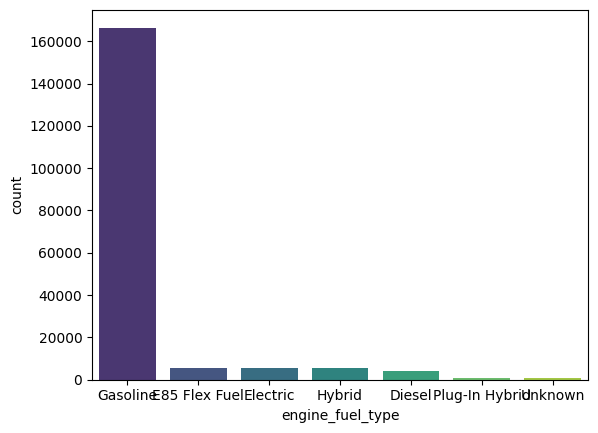

In [40]:
sns.countplot(x= df['engine_fuel_type'],hue=df['engine_fuel_type'],palette='viridis')

In [41]:
# Drop unwanted columns
drop_cols = [
    'id', 'model', 'fuel_type', 'engine', 'transmission', 
    'ext_col', 'int_col', 'int_col_grouped', 'ext_col_grouped'
]
df = df.drop(columns=drop_cols)

### fill the missing values in horsepower,displacement and culinders using mean , median and mode

In [42]:
# --- Horsepower: use mean ---
hp_mean = df['horsepower'].mean()
df['horsepower'].fillna(hp_mean, inplace=True)

# --- Displacement: use median ---
disp_median = df['displacement_L'].median()
df['displacement_L'].fillna(disp_median, inplace=True)

# --- Cylinders: use mode ---
cyl_mode = df['cylinders'].mode()[0]   # mode() returns a Series, so take the first value
df['cylinders'].fillna(cyl_mode, inplace=True)

# Check remaining missing values
print(df[['horsepower', 'displacement_L', 'cylinders']].isna().sum())

horsepower        0
displacement_L    0
cylinders         0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_11884\2849770723.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(hp_mean, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_11884\2849770723.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   brand                    188533 non-null  object 
 1   model_year               188533 non-null  int64  
 2   milage                   188533 non-null  int64  
 3   accident                 188533 non-null  object 
 4   clean_title              188533 non-null  object 
 5   price                    188533 non-null  int64  
 6   age                      188533 non-null  int64  
 7   horsepower               188533 non-null  float64
 8   displacement_L           188533 non-null  float64
 9   cylinders                188533 non-null  float64
 10  engine_fuel_type         188533 non-null  object 
 11  int_col_encoded          188533 non-null  int64  
 12  ext_col_encoded          188533 non-null  int64  
 13  transmission_normalized  188533 non-null  object 
dtypes: f

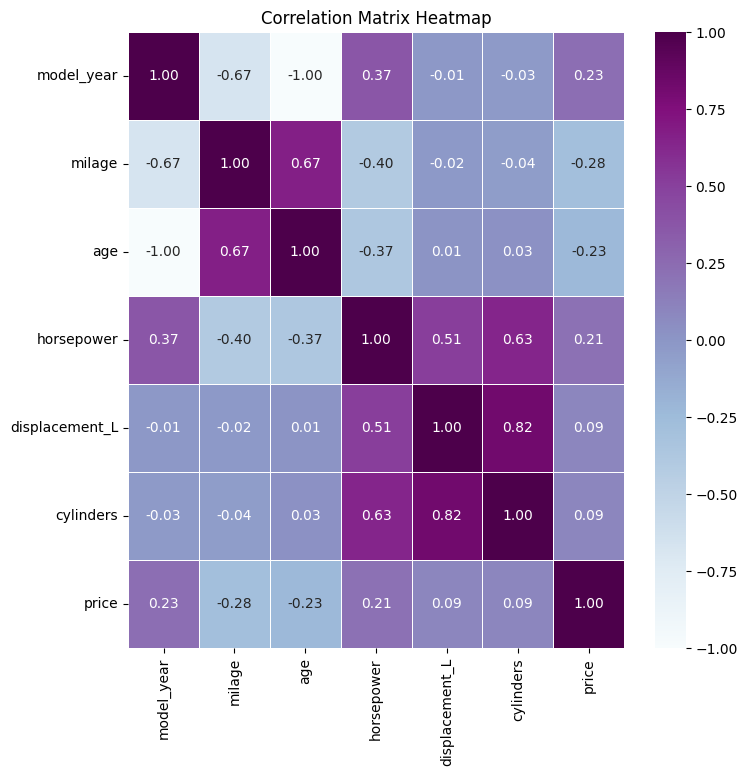

In [44]:
# Calculate the correlation matrix
numeric_columns =  df[['model_year','milage','age','horsepower','displacement_L','cylinders','price']]
correlation_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f", 
linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

###  Label Encoding

In [45]:
# Encode categorical variables
categorical_cols = ['brand', 'accident', 'clean_title', 
                    'transmission_normalized', 'engine_fuel_type']

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le  # store encoders for later inverse transform if needed

### Splitting into training and Testing data

In [46]:
# Select features (X) and log-transform the target variable (y)
X = df.drop('price', axis=1)
y = np.log1p(df['price'])  # log(1 + price)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=35
)

### Scaling the data_points to a common range

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_predictions = linear_reg.predict(X_test_scaled)
# Decision Tree Regressor
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree_reg.predict(X_test_scaled)
# Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100, 
random_state=42)
random_forest_reg.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest_reg.predict(X_test_scaled)
# XGBoost Regressor
xgboost_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators= 100, random_state=42)
xgboost_reg.fit(X_train_scaled, y_train)
xgboost_predictions = xgboost_reg.predict(X_test_scaled)

mlp_reg = MLPRegressor(
    hidden_layer_sizes=(64, 32),  # smaller layers
    max_iter=2000,
    learning_rate_init=0.005,
    early_stopping=True,          # stops when val score stops improving
    n_iter_no_change=20,
    random_state=42
)
mlp_reg.fit(X_train_scaled, y_train)
mlp_predictions = mlp_reg.predict(X_test_scaled)

# LightGBM Regressor
from lightgbm import LGBMRegressor

lightgbm_reg = LGBMRegressor(
    n_estimators=100,
    learning_rate=0.3,
    max_depth=-1,   # -1 means no limit
    random_state=42
)
lightgbm_reg.fit(X_train_scaled, y_train)
lightgbm_predictions = lightgbm_reg.predict(X_test_scaled)

# CatBoost Regressor
from catboost import CatBoostRegressor

catboost_reg = CatBoostRegressor(
    iterations=100,
    learning_rate=0.3,
    depth=6,
    random_state=42,
    verbose=0  # to silence the training logs
)
catboost_reg.fit(X_train_scaled, y_train)
catboost_predictions = catboost_reg.predict(X_test_scaled)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 738
[LightGBM] [Info] Number of data points in the train set: 150826, number of used features: 13
[LightGBM] [Info] Start training from score 10.291665


C:\Users\USER\anaconda3\envs\tf310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [49]:
models = {
    'Linear Regression': linear_reg,
    'Decision Tree Regressor': decision_tree_reg,
    'Random Forest Regressor': random_forest_reg,
    'XGBoost Regressor': xgboost_reg,
    'MLP Regressor': mlp_reg,
    'LGBMRegressor': lightgbm_reg,
    'CatBoostRegressor': catboost_reg
}

for name, model in models.items():
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(y_test, predictions)
    
    print(f"{name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

Linear Regression - MSE: 0.29, RMSE: 0.54, R²: 0.5924
Decision Tree Regressor - MSE: 0.52, RMSE: 0.72, R²: 0.2812
Random Forest Regressor - MSE: 0.27, RMSE: 0.52, R²: 0.6198
XGBoost Regressor - MSE: 0.26, RMSE: 0.51, R²: 0.6442
MLP Regressor - MSE: 0.26, RMSE: 0.51, R²: 0.6373
LGBMRegressor - MSE: 0.25, RMSE: 0.50, R²: 0.6502
CatBoostRegressor - MSE: 0.25, RMSE: 0.50, R²: 0.6487


C:\Users\USER\anaconda3\envs\tf310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


### Model Performance (Based on RMSE)

XGBoost, LGBM, and CatBoost (RMSE = 0.50)
→ These models achieved the lowest error, making them the most accurate in predicting the price.
→ They handle complex nonlinear relationships and feature interactions effectively.

Random Forest (RMSE = 0.52)
→ Performs very close to the top models, still a strong and reliable baseline.
→ A bit less accurate, but often more interpretable and stable.

MLP – Neural Network (RMSE = 0.51)
→ Performs competitively, nearly at par with the boosting models.
→ Could potentially improve further with tuning (layers, neurons, learning rate).

Linear Regression (RMSE = 0.54)
→ Performs decently but clearly worse than tree-based or neural models.
→ Suggests the data relationships are nonlinear and can’t be captured fully by a simple linear model.

Decision Tree (RMSE = 0.72)
→ Worst performer, likely due to overfitting and lack of ensemble averaging.
→ Good for interpretability, but not suitable alone for best accuracy.

In [50]:
 # Model names
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'MLP','LGBM','CatBoost']
# Corresponding RMSE scores
rmse_scores = [0.54, 0.72, 0.52, 0.50, 0.51, 0.50, 0.50]

In [51]:
# Create a DataFrame for easy plotting
performance_df = pd.DataFrame({'Model': models, 'RMSE': rmse_scores})

C:\Users\USER\AppData\Local\Temp\ipykernel_11884\334932026.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=performance_df, palette='viridis')


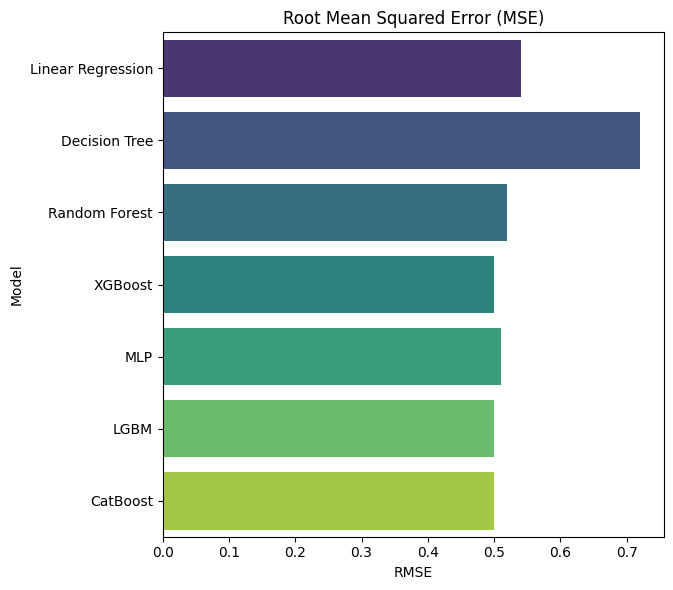

In [52]:
# Plotting
plt.figure(figsize=(12, 6))
# Bar plot for RMSE
plt.subplot(1, 2, 1)
sns.barplot(x='RMSE', y='Model', data=performance_df, palette='viridis')
plt.title('Root Mean Squared Error (MSE)')
plt.xlabel('RMSE')
plt.tight_layout()
plt.show()

In [53]:
current_year = 2025
test_data["age"] = current_year - test_data["model_year"]

In [54]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
 12  age           125690 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 12.5+ MB


In [55]:
# Extract horsepower
test_data["horsepower"] = test_data["engine"].str.extract(r"(\d+\.?\d*)HP").astype(float)

# Extract displacement in liters
test_data["displacement_L"] = test_data["engine"].str.extract(r"(\d+\.?\d*)L").astype(float)

# Extract cylinder count
test_data["cylinders"] = test_data["engine"].str.extract(r"(\d+)\s*Cylinder").astype(float)

test_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,age,horsepower,displacement_L,cylinders
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes,10,240.0,2.0,4.0
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes,5,395.0,3.0,6.0
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN,3,NaN,3.5,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN,9,NaN,NaN,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes,7,252.0,2.0,4.0


In [56]:
# Horsepower
hp_mean = test_data['horsepower'].mean()
test_data['horsepower'].fillna(hp_mean, inplace=True)

# Displacement
disp_median = test_data['displacement_L'].median()
test_data['displacement_L'].fillna(disp_median, inplace=True)

# Cylinders
cyl_mode = test_data['cylinders'].mode()[0]   # mode() returns a Series, so take the first value
test_data['cylinders'].fillna(cyl_mode, inplace=True)

# Check remaining missing values
print(test_data[['horsepower', 'displacement_L', 'cylinders']].isna().sum())


horsepower        0
displacement_L    0
cylinders         0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_11884\468322879.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['horsepower'].fillna(hp_mean, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_11884\468322879.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [57]:
def extract_fuel_from_engine(engine_str):
    if pd.isna(engine_str):
        return np.nan

    engine_str = engine_str.lower()

    # --- Hybrids ---
    if "plug-in hybrid" in engine_str or "plug-in electric/gas" in engine_str:
        return "Plug-In Hybrid"
    elif "mild hybrid" in engine_str or "gas/electric" in engine_str or "electric/gas" in engine_str:
        return "Hybrid"
    elif "hybrid" in engine_str:
        return "Hybrid"

    # --- Electric ---
    elif "electric" in engine_str or "battery" in engine_str:
        return "Electric"

    # --- Flex fuel ---
    elif "flex" in engine_str:
        return "E85 Flex Fuel"

    # --- Diesel (common keywords) ---
    elif "diesel" in engine_str:
        return "Diesel"
    elif "tdi" in engine_str or "ddi" in engine_str or "dci" in engine_str or "crdi" in engine_str:
        return "Diesel"

    # --- Gasoline (explicit + keywords) ---
    elif "gasoline" in engine_str or "petrol" in engine_str:
        return "Gasoline"
    elif "tfsi" in engine_str and "mild" in engine_str:
        return "Hybrid"
    elif "tfsi" in engine_str:
        return "Gasoline"

    # --- Default: displacement without other match → Gasoline ---
    elif "l" in engine_str or "liter" in engine_str:
        return "Gasoline"

    # --- Unknown ---
    else:
        return np.nan


# -------------------------------
# Apply mapping to DataFrame
# -------------------------------
# df is assumed to be already loaded
test_data["engine_fuel_type"] = test_data["engine"].apply(extract_fuel_from_engine)

# -------------------------------
# Compare with existing fuel_type
# -------------------------------
valid_mask = ~test_data["fuel_type"].isin([np.nan, "–", "not supported"])

comparison = (test_data.loc[valid_mask, "fuel_type"] == test_data.loc[valid_mask, "engine_fuel_type"])

accuracy = comparison.mean() * 100
print(f"Fuel type match accuracy: {accuracy:.2f}%")

# -------------------------------
# Show mismatches for inspection
# -------------------------------
mismatches = test_data.loc[valid_mask & ~comparison, ["id", "fuel_type", "engine", "engine_fuel_type"]]
print("\nSample mismatches:")
print(mismatches.head(20))

Fuel type match accuracy: 98.19%

Sample mismatches:
          id fuel_type                                             engine  \
74    188607    Hybrid                                    3.0 Liter Turbo   
90    188623    Hybrid                                          3.0 Liter   
159   188692  Gasoline        422.0HP Electric Motor Electric Fuel System   
188   188721    Hybrid                                    3.0 Liter Turbo   
246   188779    Hybrid                                     4.0 Liter TFSI   
267   188800  Gasoline        425.0HP Electric Motor Electric Fuel System   
278   188811    Hybrid                                     2.0 Liter TFSI   
410   188943    Hybrid  416.0HP 3.0L V6 Cylinder Engine Plug-In Electr...   
483   189016  Gasoline        455.0HP Electric Motor Electric Fuel System   
592   189125  Gasoline                                                 V8   
644   189177    Hybrid                                     2.0 Liter TFSI   
677   189210    Hybrid 

In [58]:
test_data['accident'] = test_data['accident'].fillna("Unknown")
test_data['clean_title'] = test_data['clean_title'].fillna("Unknown")

In [59]:
# Step 1: Normalize colors
def normalize_color(color):
    if pd.isna(color) or color.strip() in ["–", "not supported"]:
        return "unknown"
    color = color.lower().strip()
    color = color.replace("-", " ").replace("/", " ")
    return color

test_data['int_col'] = test_data['int_col'].apply(normalize_color)

# Step 2: Group into base colors
def group_color(color):
    if color == "unknown":
        return "unknown"
    elif any(c in color for c in ["black", "ebony", "dark"]):
        return "black"
    elif any(c in color for c in ["gray", "grey", "silver", "graphite"]):
        return "gray"
    elif any(c in color for c in ["beige", "tan", "ivory", "cream", "almond"]):
        return "beige"
    elif any(c in color for c in ["brown", "mocha", "chocolate", "espresso", "coffee"]):
        return "brown"
    elif any(c in color for c in ["red", "burgundy", "maroon", "wine"]):
        return "red"
    elif any(c in color for c in ["blue", "navy", "indigo"]):
        return "blue"
    elif any(c in color for c in ["white", "pearl"]):
        return "white"
    else:
        return "other"

test_data['int_col_grouped'] = test_data['int_col'].apply(group_color)

# Step 3: Encode (Label Encoding)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_data['int_col_encoded'] = le.fit_transform(test_data['int_col_grouped'])

# Show results
print(test_data[['int_col', 'int_col_grouped', 'int_col_encoded']].sample(40))
print("Classes:", le.classes_)

          int_col int_col_grouped  int_col_encoded
10232        gray            gray                4
17783   jet black           black                1
45410       black           black                1
70325       black           black                1
113055      black           black                1
102886       gray            gray                4
56436       beige           beige                0
102949      black           black                1
115107       gray            gray                4
75557        gray            gray                4
118593      black           black                1
17256       black           black                1
33279       black           black                1
12168       black           black                1
47089       black           black                1
109785      black           black                1
83283       black           black                1
38443        gray            gray                4
77689       black           bla

In [60]:
# Step 1: Normalize
def normalize_ext_color(color):
    if pd.isna(color) or color.strip() in ["–", "metallic", "custom color"]:
        return "unknown"
    color = color.lower().strip()
    color = color.replace("-", " ").replace("/", " ")
    return color

test_data['ext_col'] = test_data['ext_col'].apply(normalize_ext_color)

# Step 2: Group into base categories
def group_ext_color(color):
    if any(c in color for c in ["black", "ebony", "onyx", "raven", "sapphire"]):
        return "black"
    elif any(c in color for c in ["gray", "grey", "graphite", "granite", "slate", "anthracite", "charcoal"]):
        return "gray"
    elif any(c in color for c in ["white", "pearl", "alpine", "snow"]):
        return "white"
    elif any(c in color for c in ["silver", "platinum", "chrome"]):
        return "silver"
    elif any(c in color for c in ["red", "burgundy", "maroon", "crimson", "rosso", "garnet"]):
        return "red"
    elif any(c in color for c in ["blue", "navy", "indigo", "aqua", "cobalt"]):
        return "blue"
    elif any(c in color for c in ["green", "emerald", "jungle", "olive", "verde"]):
        return "green"
    elif any(c in color for c in ["yellow", "gold", "amber", "champagne", "bronze", "silician"]):
        return "yellow"
    elif any(c in color for c in ["orange", "copper", "mango", "tango"]):
        return "orange"
    elif any(c in color for c in ["brown", "mocha", "bronze", "espresso", "cocoa"]):
        return "brown"
    elif any(c in color for c in ["beige", "sand", "almond", "tan", "ivory"]):
        return "beige"
    elif "purple" in color or "plum" in color or "violet" in color:
        return "purple"
    elif "pink" in color or "rose" in color:
        return "pink"
    elif color == "unknown":
        return "unknown"
    else:
        return "other"

test_data['ext_col_grouped'] = test_data['ext_col'].apply(group_ext_color)

# Step 3: Encode (Label Encoding)
le_ext = LabelEncoder()
test_data['ext_col_encoded'] = le_ext.fit_transform(test_data['ext_col_grouped'])

# Show results
print(test_data[['ext_col', 'ext_col_grouped', 'ext_col_encoded']].head(20))
print("Classes:", le_ext.classes_)

                     ext_col ext_col_grouped  ext_col_encoded
0                      white           white               13
1                     silver          silver               11
2                      white           white               13
3            silician yellow          yellow               14
4                       gray            gray                4
5                      black           black                1
6                     silver          silver               11
7        silver ice metallic          silver               11
8                      black           black                1
9                      black           black                1
10                     black           black                1
11                     black           black                1
12    deep crystal blue mica            blue                2
13                      gray            gray                4
14                     white           white               13
15  sant

In [61]:
def normalize_transmission(trans_col):
    """
    Normalize and group transmission types into broader categories.
    
    Args:
        trans_col (pd.Series): The transmission column from dataframe.
    
    Returns:
        pd.Series: Normalized transmission categories.
    """
    def map_transmission(val):
        if pd.isna(val):
            return "Unknown"
        
        val = str(val).strip().upper()
        
        # Manual Transmissions
        if "M/T" in val or "MANUAL" in val or val.endswith("MT"):
            return "Manual"
        
        # CVT (Continuously Variable Transmission)
        if "CVT" in val:
            return "CVT"
        
        # DCT (Dual Clutch Transmission)
        if "DCT" in val or "DUAL" in val:
            return "DCT"
        
        # Single-speed or EV style
        if "SINGLE-SPEED" in val or "1-SPEED" in val or "FIXED GEAR" in val:
            return "Single-Speed / EV"
        
        # Automatic Transmissions
        if "A/T" in val or "AUTOMATIC" in val or "AT" in val:
            return "Automatic"
        
        # Catch noise or unclear values
        return "Unknown"
    
    return trans_col.apply(map_transmission)

In [62]:
# Apply the normalization to the transmission column
test_data["transmission_normalized"] = normalize_transmission(test_data["transmission"])

# Preview results
print(test_data[["transmission", "transmission_normalized"]].head(15))

                      transmission transmission_normalized
0                      6-Speed A/T               Automatic
1                      8-Speed A/T               Automatic
2               10-Speed Automatic               Automatic
3                        Automatic               Automatic
4                              A/T               Automatic
5                              A/T               Automatic
6   Transmission w/Dual Shift Mode                     DCT
7                6-Speed Automatic               Automatic
8                      7-Speed A/T               Automatic
9                      8-Speed A/T               Automatic
10                             A/T               Automatic
11                     5-Speed M/T                  Manual
12               6-Speed Automatic               Automatic
13                             A/T               Automatic
14                     6-Speed A/T               Automatic


In [63]:
valid_fuel_types = ['Gasoline', 'E85 Flex Fuel', 'Hybrid', 'Diesel', 'Plug-In Hybrid']

def finalize_fuel_type(row):
    # If engine_fuel_type is valid, keep it
    if pd.notna(row['engine_fuel_type']) and row['engine_fuel_type'] not in ["–", "not supported"]:
        return row['engine_fuel_type']
    
    # Otherwise, try to use the original fuel_type if it's valid
    if row['fuel_type'] in valid_fuel_types:
        return row['fuel_type']
    
    # If both are invalid or missing, mark as Unknown
    return "Unknown"

# Apply function
test_data['engine_fuel_type'] = test_data.apply(finalize_fuel_type, axis=1)

# Check distribution
print(test_data['engine_fuel_type'].value_counts(dropna=False))

engine_fuel_type
Gasoline          111059
Hybrid              3755
Electric            3599
E85 Flex Fuel       3581
Diesel              2811
Unknown              529
Plug-In Hybrid       356
Name: count, dtype: int64


In [64]:
# Drop unwanted columns
drop_cols = [
    'id', 'model', 'fuel_type', 'engine', 'transmission', 
    'ext_col', 'int_col', 'int_col_grouped', 'ext_col_grouped'
]
test_data = test_data.drop(columns=drop_cols)

In [65]:
# Encode categorical variables
categorical_cols = ['brand', 'accident', 'clean_title', 
                    'transmission_normalized', 'engine_fuel_type']

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col].astype(str))
    le_dict[col] = le  # store encoders for later inverse transform if needed

In [66]:
test_scaled = scaler.transform(test_data)

In [67]:
xgboost_test_pred_log = xgboost_reg.predict(test_scaled)

In [68]:
xgboost_test_pred = np.expm1(xgboost_test_pred_log)

In [69]:
test_data["price"] = xgboost_test_pred

In [70]:
test_data.head()

,brand,model_year,milage,accident,clean_title,age,horsepower,displacement_L,cylinders,engine_fuel_type,int_col_encoded,ext_col_encoded,transmission_normalized,price
0,26,2015,98000,1,1,10,240.000000,2.0,4.0,3,0,13,0,16392.253906
1,26,2020,9142,1,1,5,395.000000,3.0,6.0,4,1,11,0,61296.464844
2,14,2022,28121,1,0,3,342.797283,3.5,6.0,3,1,13,0,48540.273438
3,3,2016,61258,1,0,9,342.797283,3.5,6.0,3,1,14,0,26290.224609
4,3,2018,59000,1,1,7,252.000000,2.0,4.0,3,1,4,0,30114.798828


In [71]:
submission['price'] = test_data['price']

### 📌 Conclusion & Recommendation

After extensive data cleaning, feature engineering, exploratory analysis, and training multiple machine learning models, the following insights and results were obtained:

Model Performance (RMSE):

Linear Regression: ~0.54

Decision Tree: ~0.72

Random Forest: ~0.52

XGBoost: ~0.50

MLP: ~0.51

LightGBM: ~0.50

CatBoost: ~0.50

Best Performing Models:
Boosting algorithms (XGBoost, LightGBM, and CatBoost) consistently delivered the lowest RMSE (~0.50), indicating better prediction accuracy compared to other models. Random Forest also performed competitively.

Key Insights:

Car price decreases as mileage increases.

Newer model years retain higher resale value.

Cars with no accident history are priced higher.

Engine-related features (horsepower, displacement, cylinders) significantly affect price.

✅ Recommendation

For deployment and real-world applications:

XGBoost or LightGBM should be prioritized due to their strong balance of accuracy, speed, and scalability.

Further improvements can be made by:

Collecting additional features (e.g., location, brand reputation, maintenance history).

Applying advanced feature engineering techniques such as polynomial features or interaction terms.

Using stacking/ensemble methods to combine the strengths of multiple models.

Overall, this project provides a solid baseline for predicting car prices and can be extended into a production-ready model with additional tuning and richer datasets.